# OpenCV & NumPy Simple Image Processing


In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
path = 'images'

## View image with OpenCV: `cv2.imshow()`

### The image can be sliced to trim it, which is useful for focusing on specific areas of the image.

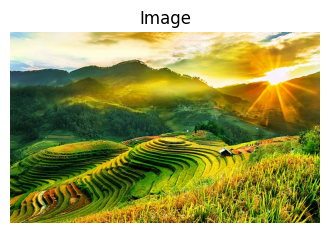

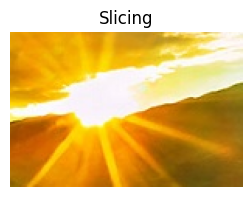

In [15]:
# Read image
image = cv2.imread(path + '/nature.jpg')

# Show image and its slicing
plt.figure(figsize=(4,4))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Image")
plt.axis('off')
plt.show()

# Slicing the image to focus on a specific area
image_crop = image[50:150, 500:700]
plt.figure(figsize=(3,3))
plt.imshow(cv2.cvtColor(image_crop, cv2.COLOR_BGR2RGB))
plt.title("Slicing")
plt.axis('off')
plt.show()

In [16]:

print(f'Shape of colorful image: {image.shape}')
print(f'Type of colorful image: {type(image)}')
print(f'Type of each pixel is: {type(image[0,0,0])}')

Shape of colorful image: (400, 650, 3)
Type of colorful image: <class 'numpy.ndarray'>
Type of each pixel is: <class 'numpy.uint8'>


### Read a grayscale image and display it using OpenCV

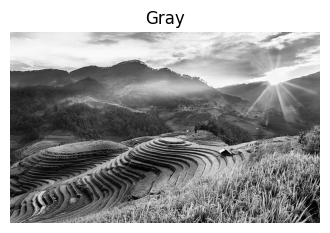

Shape of grayscale image: (400, 650)


In [17]:
image_gray = cv2.imread(path + '/nature.jpg', 0)
plt.figure(figsize=(4,4))
plt.imshow(image_gray, cmap='gray')
plt.title("Gray")
plt.axis('off')
plt.show()

print(f'Shape of grayscale image: {image_gray.shape}')

## Rotate image with NumPy: `np.rot90()`

### We can pass arguments to `np.rot90()`, defaulting to 1 rotation (90 degrees), 2 rotations (180 degrees), or 3 rotations (270 degrees). The `k` parameter specifies the number of times to rotate the image by 90 degrees.

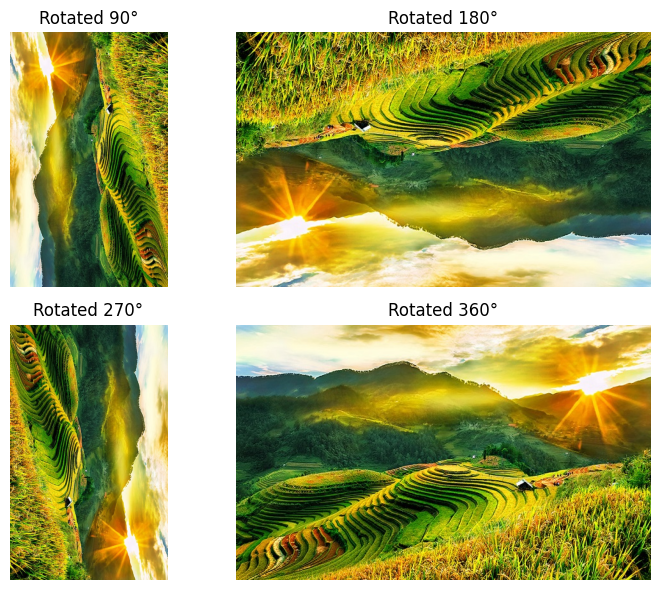

In [18]:
# Convert image to RGB for display because OpenCV loads images in BGR format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_rot_90 = np.rot90(image_rgb, k=1)
image_rot_180 = np.rot90(image_rgb, k=2)
image_rot_270 = np.rot90(image_rgb, k=3)
image_rot_360 = np.rot90(image_rgb, k=4)

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes[0, 0].imshow(image_rot_90)
axes[0, 0].set_title("Rotated 90°")
axes[0, 1].imshow(image_rot_180)
axes[0, 1].set_title("Rotated 180°")
axes[1, 0].imshow(image_rot_270)
axes[1, 0].set_title("Rotated 270°")
axes[1, 1].imshow(image_rot_360)
axes[1, 1].set_title("Rotated 360°")
for ax in axes.flat:
    ax.axis('off')
plt.tight_layout()
plt.show()

### Tranpose image

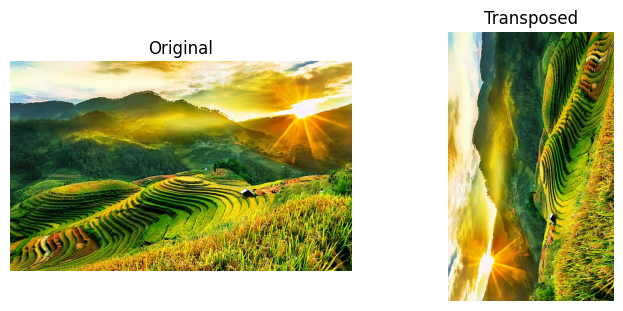

In [19]:
image_rgb_transposed = image_rgb.transpose((1, 0, 2))

fig, axes = plt.subplots(1, 2, figsize=(7, 3), constrained_layout=True)
axes[0].imshow(image_rgb)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(image_rgb_transposed)
axes[1].set_title("Transposed")
axes[1].axis("off")

plt.show()

### 'Plus' image

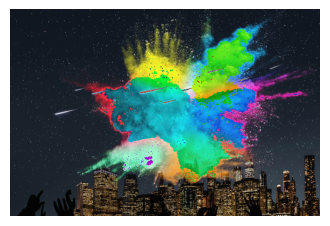

In [20]:
image_1 = plt.imread(path + '/colorfull-1.jpg')
image_2 = plt.imread(path + '/colorfull-2.jpg')

# Resize image_2 to match image_1's shape
image_2_resized = cv2.resize(image_2, (image_1.shape[1], image_1.shape[0]))

image_plus = image_1 + image_2_resized

plt.figure(figsize=(4,4))
plt.imshow(image_plus)
plt.axis('off')
plt.show()

## Flipping image

### Manually

#### Vertically

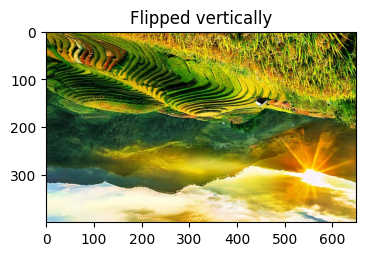

In [21]:
img = plt.imread(path + '/nature.jpg')
img = img.astype(float)

# Take shapes (height, width, channel)
height, width, channels = img.shape

# Transform matrix (flip wrt x axis, or i.e., vertical flip)
transform = np.array([[1, 0], [0, -1]])

# Initialize output matrix with same shape as input image
output = np.zeros((height, width, channels))

# Iterate over each pixel in the original image
for h in range(height):
    for w in range(width):
        pixel = img[h, w, :]
        new_j, new_i = transform@np.array([w, h]) + [0, height - 1]
        output[new_i, new_j] = pixel

output = output.astype(np.uint8)
plt.imsave(path + '/vertically_flipped.jpg', output)
plt.figure(figsize=(4,4))
plt.imshow(output)
plt.title("Flipped vertically")
plt.show()

#### Horizontally

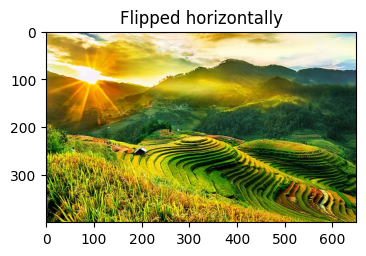

In [22]:
img = plt.imread(path + '/nature.jpg')
img = img.astype(float)

height, width, channels = img.shape
transform = np.array([[-1, 0], [0, 1]])
output = np.zeros((height, width, channels))
for h in range(height):
    for w in range(width):
        pixel = img[h, w, :]
        new_j, new_i = transform@np.array([w, h]) + [width - 1, 0]
        output[new_i, new_j] = pixel

output = output.astype(np.uint8)
plt.imsave(path + '/horizontally_flipped.jpg', output)
plt.figure(figsize=(4,4))
plt.imshow(output)
plt.title("Flipped horizontally")
plt.show()

### Using built-in functions

#### Using `cv2.flip()`
`flipCode` can be:
- `0`: flip vertically
- `1`: flip horizontally
- `-1`: flip both vertically and horizontally

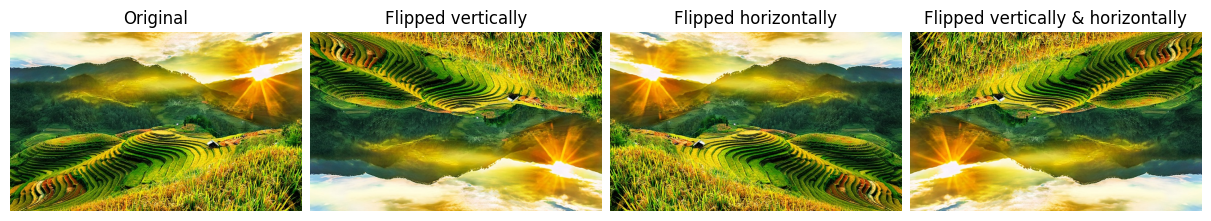

In [23]:
img = plt.imread(path + '/nature.jpg')
fig, ax = plt.subplots(1, 4, figsize=(12, 4), constrained_layout=True)

titles = [
    "Original",
    "Flipped vertically",
    "Flipped horizontally",
    "Flipped vertically & horizontally"
]
images = [
    img,
    cv2.flip(img, 0),
    cv2.flip(img, 1),
    cv2.flip(img, -1)
]

for i in range(4):
    ax[i].imshow(images[i])
    ax[i].set_title(titles[i], fontsize=12)
    ax[i].axis('off')

plt.show()

## Increase/Decrease brightness
Because OpenCV images contain uint8 pixel values (range [0,255]), so we must convert to float to avoid overflow when adding or subtracting brightness values. After processing, we convert back to uint8.

We can implement in 3 ways: `loop`, `np.clip()`, and `np.where()`.
- Example of using `loop`:
```python
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        for k in range(image.shape[2]):
            image[i, j, k] = np.clip(image[i, j, k] + brightness, 0, 255)
```
- Example of using `np.clip()` in the cell below
- Example of using `np.where()`:
```python
image = np.where(image + brightness > 255, 255, image + brightness)
```

### Increase brightness

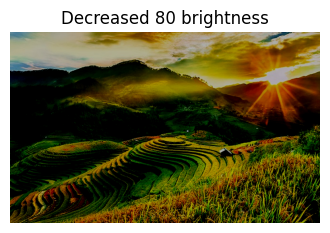

In [24]:
image_bright_dec80 = image_rgb.copy()
image_bright_dec80 = image_bright_dec80.astype(float)

image_bright_dec80 -= 80
image_bright_dec80 = np.clip(image_bright_dec80, 0, 255)
image_bright_dec80 = image_bright_dec80.astype(np.uint8)

plt.imsave(path + '/decrease80_clip.jpg', image_bright_dec80)
plt.figure(figsize=(4,4))
plt.imshow(image_bright_dec80)
plt.title("Decreased 80 brightness")
plt.axis('off')
plt.show()

### Decrease brightness

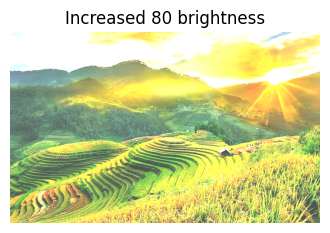

In [25]:
image_bright_inc80 = image_rgb.copy()
image_bright_inc80 = image_bright_inc80.astype(float)

image_bright_inc80 += 80
image_bright_inc80 = np.clip(image_bright_inc80, 0, 255)
image_bright_inc80 = image_bright_inc80.astype(np.uint8)

plt.imsave(path + '/increase80_clip.jpg', image_bright_inc80)
plt.figure(figsize=(4,4))
plt.imshow(image_bright_inc80)
plt.title("Increased 80 brightness")
plt.axis('off')
plt.show()

## Background subtraction (or foreground extraction)

### Manually

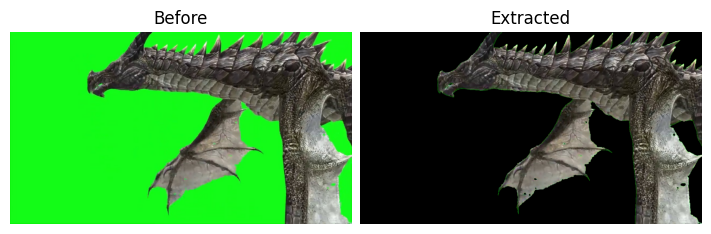

In [26]:
img = plt.imread(path + '/maxresdefault.jpg')
rgb8 = (img * 255.0).round().astype(np.uint8) if np.issubdtype(img.dtype, np.floating) else img

target = np.array([19, 252, 23], dtype=np.int16)
tol = 100
diff = np.abs(rgb8.astype(np.int16) - target)
is_green = (diff <= tol).all(axis=2)
extracted = np.where(is_green[..., None], 0, rgb8).astype(np.uint8)

fig, ax = plt.subplots(1, 2, figsize=(7, 3), constrained_layout=True)
ax[0].imshow(rgb8);      ax[0].set_title('Before');    ax[0].axis('off')
ax[1].imshow(extracted); ax[1].set_title('Extracted'); ax[1].axis('off')
plt.show()

### Using np.subtract()

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Magic command to display inline
%matplotlib inline

# Load images
image_city = plt.imread('images/colorfull-2.jpg')
dragon_with_background = plt.imread('images/maxresdefault.jpg')
background = plt.imread('images/background.jpg')

# Ensure all images are uint8 and same shape
def to_uint8(img):
    if np.issubdtype(img.dtype, np.floating):
        img = (img * 255.0).round().astype(np.uint8)
    return img

image_city = to_uint8(image_city)
dragon_with_background = to_uint8(dragon_with_background)
background = to_uint8(background)

dragon_with_background = cv2.resize(dragon_with_background, (image_city.shape[1], image_city.shape[0]))
background = cv2.resize(background, (image_city.shape[1], image_city.shape[0]))

In [28]:
print(image_city.shape, dragon_with_background.shape)

(1372, 2484, 3) (1372, 2484, 3)


In [29]:
dragon_with_background = cv2.resize(dragon_with_background, (image_city.shape[1], image_city.shape[0]))
background = cv2.resize(background, (image_city.shape[1], image_city.shape[0]))

In [30]:
print(image_city.shape, dragon_with_background.shape)

(1372, 2484, 3) (1372, 2484, 3)


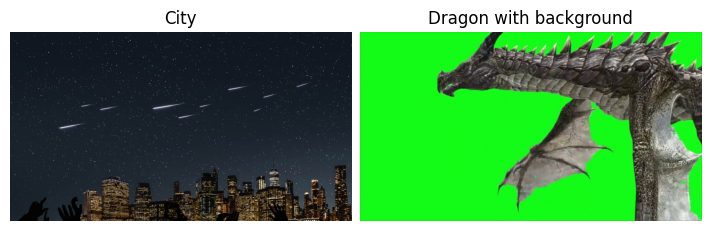

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3), constrained_layout=True)
ax[0].imshow(image_city)
ax[0].set_title("City")
ax[0].axis('off')
ax[1].imshow(dragon_with_background)
ax[1].set_title("Dragon with background")
ax[1].axis('off')
plt.show()

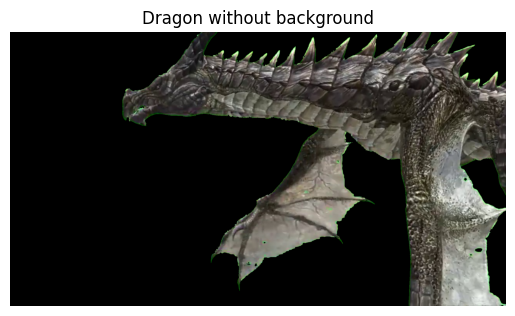

In [32]:
# Compute absolute difference between dragon_with_background and background
diff = cv2.absdiff(dragon_with_background, background)

# Create mask: pixels with large difference are foreground (dragon), small difference are background
threshold = 100
mask = np.any(diff > threshold, axis=2)

# Create output: keep dragon where mask is True, else set to transparent (or black)
dragon_fg = np.zeros_like(dragon_with_background)
dragon_fg = np.where(mask[..., None], dragon_with_background, 0)

plt.imshow(dragon_fg)
plt.title("Dragon without background")
plt.axis('off')
plt.show()

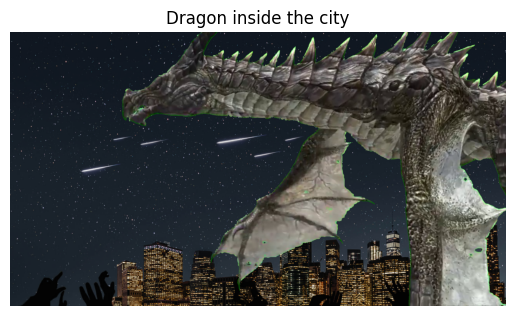

In [33]:
# Overlay dragon foreground onto city image using mask
output = np.where(mask[..., None], dragon_fg, image_city)
plt.imshow(output)
plt.title("Dragon inside the city")
plt.axis('off')
plt.show()

In [34]:
# import cv2, matplotlib.pyplot as plt

# # Tạo đối tượng VideoCapture để đọc video từ camera
# cap = cv2.VideoCapture(0)  # Số 0 thể hiện camera mặc định, nếu có nhiều camera, hãy chọn số thích hợp.

# # Kiểm tra xem camera có mở thành công hay không
# if not cap.isOpened():
#     print("Không thể mở camera.")
#     exit()

# # Đọc khung hình từ camera
# ret, frame = cap.read()

# # Kiểm tra xem việc đọc khung hình có thành công hay không
# if not ret:
#     print("Không thể đọc khung hình.")
#     exit()

# # Giải phóng tài nguyên
# cap.release()

# # Hiển thị khung hình inline bằng matplotlib
# plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))  # Chuyển đổi từ BGR sang RGB, vì OpenCV sử dụng BGR
# plt.axis('off')  # Tắt trục
# plt.title("Camera Frame")
# plt.show()